<a href="https://colab.research.google.com/github/juanapucheta/modulo1_HCSPD/blob/main/RLC_PUCHETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install octave #INSTALO OCTAVE

In [ ]:
!apt install octave python3-sympy #INSTALO EL PAQUETE SYMBOLIC DE OCTAVE

In [3]:
%%writefile modulo1.m
pkg install -forge symbolic  #INGAGURO EL ARCHIVO DONDE VOY A ESCRIBIR LO QUE SIGA

Writing modulo1.m


In [4]:
!octave -W modulo1.m  #CORRE EL CODIGO DENTRO DEL ARCHIVO MODULO1

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [5]:
%%writefile PRACTICO_RLC1.m
pkg load symbolic
#PRIMER PUNTO DEL TRABAJO MODULO1
R=1;L=1;C=1;

syms ii(t) v(t)
ode2=diff(v)==ii/C;
ode1=diff(ii)==-R/L*ii-1/L*v+1/L*heaviside(0);
ode1=diff(ii)==-ii-v+heaviside(0,1);%heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = v(0) == 0;
conds = [cond1;cond2];
odes = [ode1; ode2];
Sol=dsolve(odes,ii(0) == .0,v(0) == .0);
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.v)

Writing PRACTICO_RLC1.m


In [7]:
!octave -W PRACTICO_RLC1.m

Symbolic pkg v3.1.1: Python communication link active, SymPy v1.12.
    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    plus at line 53 column 5
    plus at line 61 column 5
    PRACTICO_RLC1 at line 7 column 5

<stdin>:7: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

Corriente = (sym)

        -t           
        ───          
         2     ⎛√3⋅t⎞
  2⋅√3⋅ℯ   ⋅sin⎜────⎟
               ⎝ 2  ⎠
  ───────────────────
           3         

Tension = (sym)

            -t               
            ───              
             2     ⎛√3⋅t   π⎞
     

In [ ]:
# !pip install --user sympy==1.5.1

In [9]:
%%writefile PRACTICO_RLC2.m
R=2200;L=10e-6;C=100e-9;

syms ii(t) v(t)
ode2=diff(v)==ii/C;
ode1=diff(ii)==-R/L*ii-1/L*v+1/L*heaviside(0);
ode1=diff(ii)==-ii-v+heaviside(0,1);%heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = v(0) == 0;
conds = [cond1;cond2];
odes = [ode1; ode2];
Sol=dsolve(odes,ii(0) == .0,v(0) == .0);
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.v)

Writing PRACTICO_RLC2.m


VERIFICACION NUMERICA

In [10]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0];ii=0;t_etapa=1e-8;wRef=2;tF=1e-3;
color_='r';
color='b';
Ts=t_etapa;
%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1);
u=0;TL=1.15e-4;u=12;
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Writing Verificacion_Num.m


In [11]:
%%writefile modrlc.m
%Funcion modelo
function [X]=modrlc(t_etapa, xant, accion)
h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
% eig(A)
% 1./ans
C=[R 0];u=accion;
x=xant;
for ii=1:t_etapa/h
xp=A*x+B*u;
x=x+xp*h;
end
X=[x];%x1 corriente, x2 tensión

Writing modrlc.m


In [12]:
!octave -W Verificacion_Num.m

In [13]:
# -W : no window system
# !octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

In [ ]:
# from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
# drive.mount('/content/drive')

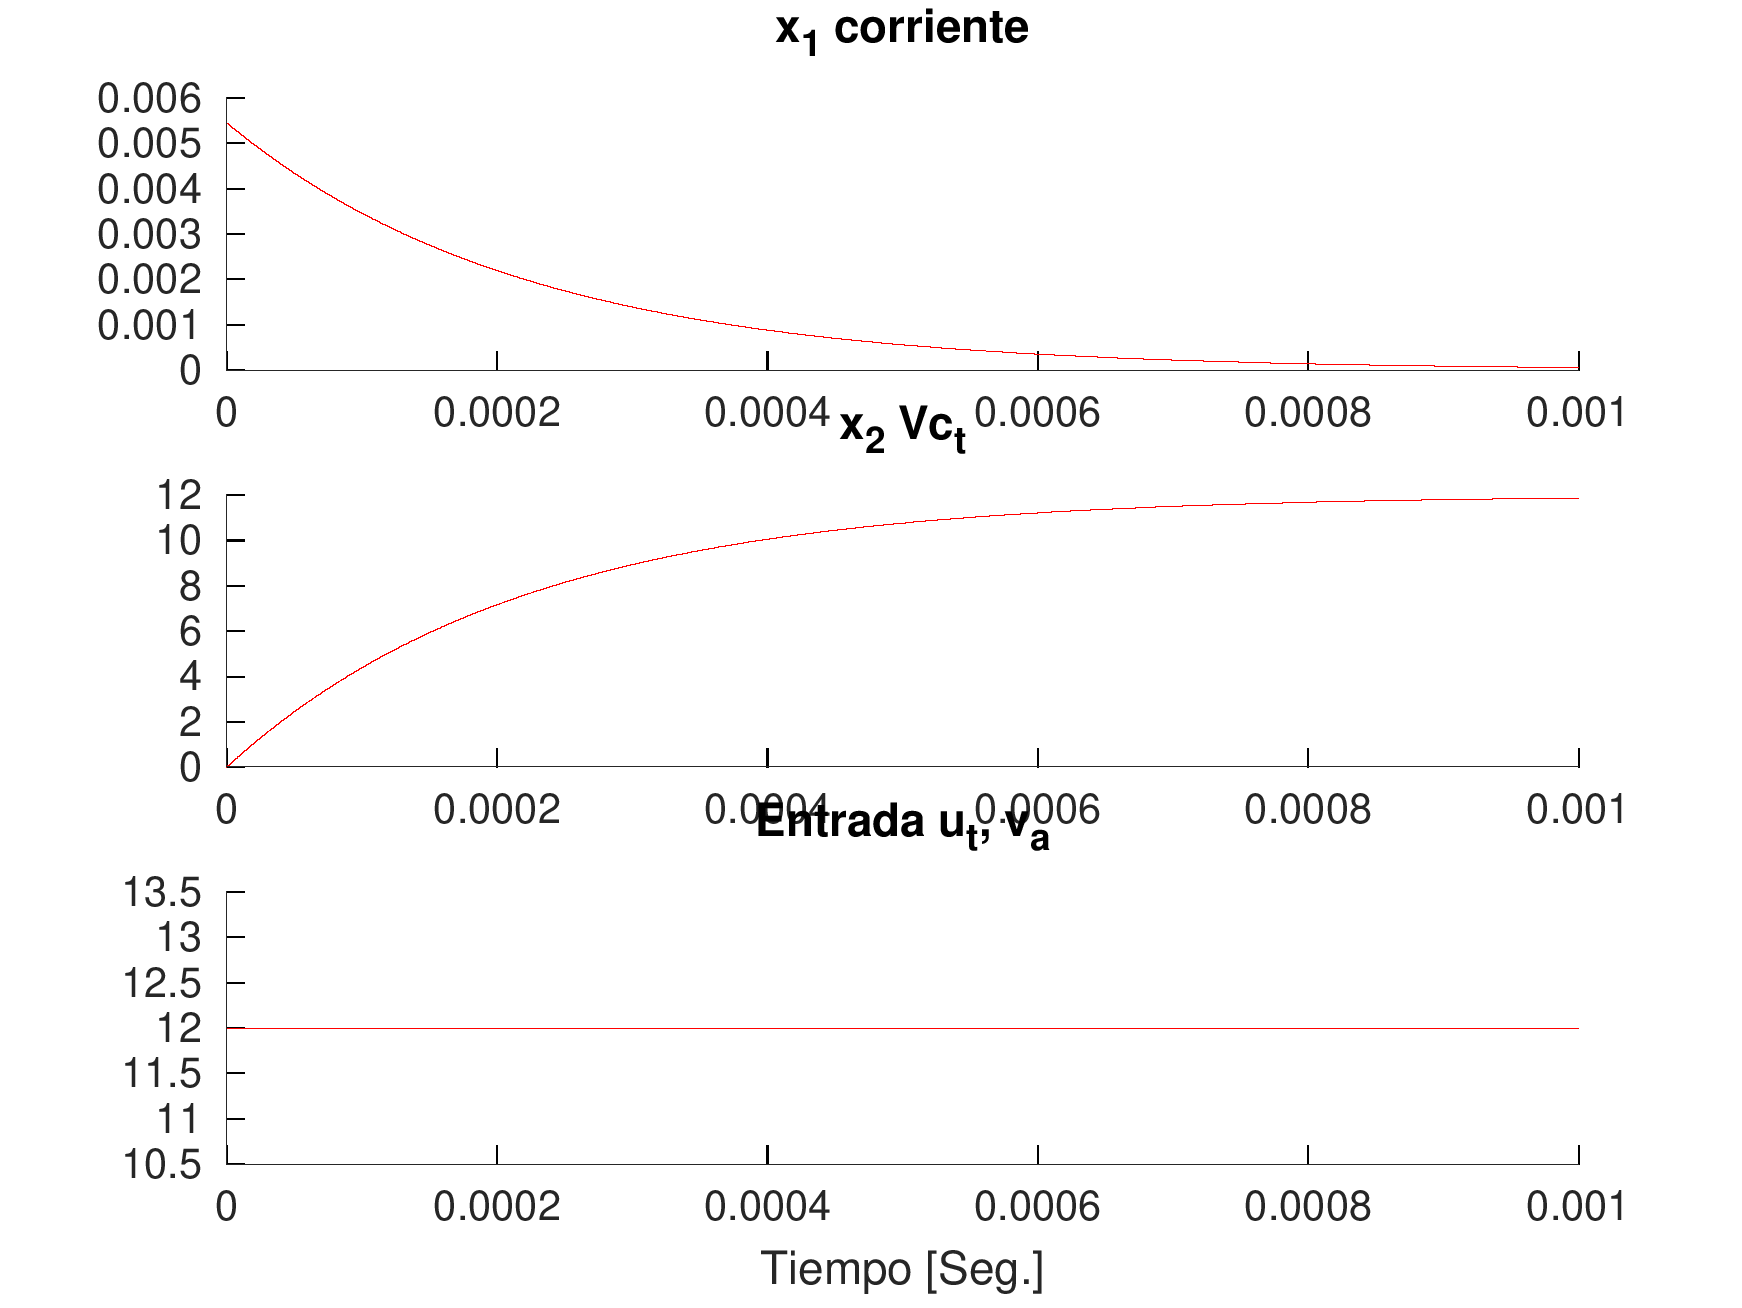

In [15]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt